In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [32]:
df = pd.read_csv(r'C:\Users\Kirthik\Downloads\AirQualityUCI\AirQualityUCI.csv', delimiter=';', decimal=',')
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

In [33]:
df.set_index('datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)
df.replace(to_replace=-200, value=np.nan, inplace=True)
df_hourly = df.resample('H').mean().ffill()

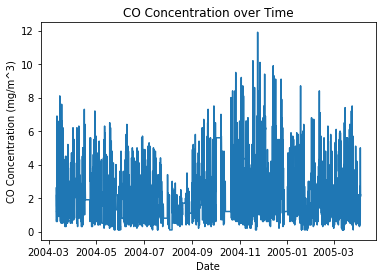

In [34]:
plt.plot(df_hourly['CO(GT)'])
plt.title('CO Concentration over Time')
plt.xlabel('Date')
plt.ylabel('CO Concentration (mg/m^3)')
plt.show()

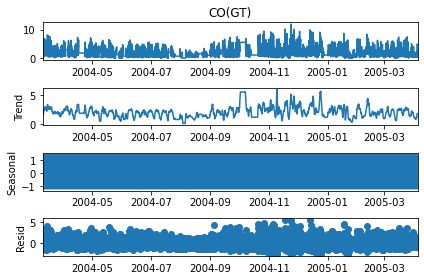

In [35]:
decomposition = seasonal_decompose(df_hourly['CO(GT)'].fillna(method='ffill'), model='additive', period=24)
fig = decomposition.plot()
plt.show()

In [38]:
train_size = int(len(df_hourly) * 0.8)
train_data, test_data = df_hourly.iloc[:train_size], df_hourly.iloc[train_size:]
model = ARIMA(train_data['CO(GT)'].fillna(method='ffill'), order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test_data))[0]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


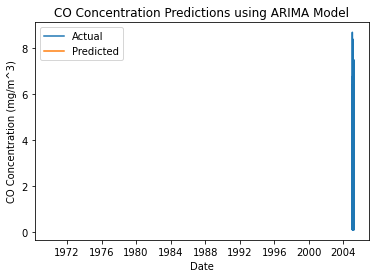

In [37]:
plt.plot(test_data['CO(GT)'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('CO Concentration Predictions using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('CO Concentration (mg/m^3)')
plt.legend()
plt.show()